In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import missingno as msno
import statsmodels.api as sm
#import tensorflow as tf
#imp
df = pd.read_csv(r"C:\Users\Hamza\Desktop\P2P ortak dosya\Makine Öğrenmesi\Solar1\solar_predict.xls")   #dataframe determined
df.columns=["Date","Time","Power","Load","Temp"]   #the columns in our dataframe
from datetime import datetime
from pytz import timezone
import pytz
df.index=df.iloc[:,0]
df.index = pd.to_datetime(df.index)  #convert to date
df.drop(['Load'], axis=1, inplace=True)   #I will just look at PV Generation
df['MonthOfYear'] = df.index.strftime('%m').astype(int)
df['DayOfYear'] = df.index.strftime('%j').astype(int)
df['WeekOfYear'] = df.index.strftime('%U').astype(int)
df.index=df.iloc[:,1]
df.index = pd.to_datetime(df.index)
df['TimeOfDay'] = df.index.hour
from pytz import timezone
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import neighbors
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import Range1d
#from tensorflow.keras.layers import Dense,Activation,Dropout
#from tensorflow.keras.models import Sequential,load_model
#from tensorflow.keras.optimizers import SGD, Adam
#from tensorflow.keras.models import Sequential
from collections import Counter
from scipy import stats
from sklearn.linear_model import LinearRegression, BayesianRidge, Ridge ,Lasso ,ElasticNet, LassoLarsIC
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import KFold,RandomizedSearchCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, scale, LabelEncoder  
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor 
from sklearn.svm import SVR
#from catboost import CatBoostRegressor
#from lightgbm import LGBMRegressor
#from xgboost import XGBRegressor
from warnings import filterwarnings
filterwarnings('ignore')
df = pd.read_csv(r"C:\Users\Hamza\Desktop\P2P ortak dosya\Makine Öğrenmesi\Solar1\solar_predict.xls")   #dataframe determined
df.columns=["Date","Time","Power","Load","Temp"]   #the columns in our dataframe
from datetime import datetime
from pytz import timezone
import pytz
df.index=df.iloc[:,0]
df.index = pd.to_datetime(df.index)  #convert to date
df.drop(['Load'], axis=1, inplace=True)   #I will just look at PV Generation
df['MonthOfYear'] = df.index.strftime('%m').astype(int)
df['DayOfYear'] = df.index.strftime('%j').astype(int)
df['WeekOfYear'] = df.index.strftime('%U').astype(int)
df.index=df.iloc[:,1]
df.index = pd.to_datetime(df.index)
df['TimeOfDay'] = df.index.hour

# XGBOOST

In [6]:
X = df[['MonthOfYear', 'DayOfYear', 'WeekOfYear',"TimeOfDay","Temp"]]
y = df.iloc[:,2:3]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
import xgboost
from xgboost import XGBRegressor
xgb = XGBRegressor().fit(X_train, y_train)  #fit
y_pred = xgb.predict(X_test)                #predict
np.sqrt(mean_squared_error(y_test, y_pred)) #mse

0.16507622600956984

In [7]:
#lgbm
#'min_data_in_leaf':300 
#'feature_fraction':0.8 
#'bagging_fraction':0.8,
#'bagging_freq':10
#'max_depth':8,
#'num_leaves':70,
#'learning_rate':0.04
#xgbm
#{'gamma': 0,
#'learning_rate': 0.3,
#'max_depth': 4,
#'n_estimators': 500,
#'subsample': 0.8}
xgb = XGBRegressor()
xgb_params = {"learning_rate": [0.1,0.01,0.5],
             "max_depth": [2,3,4,5,8],
             "n_estimators": [100,200,500,1000],
             "colsample_bytree": [0.4,0.7,1]}

In [8]:
xgb_cv_model  = GridSearchCV(xgb,xgb_params, cv = 5, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV] colsample_bytree=0.4, learning_rate=0.1, max_depth=2, n_estimators=100 
[CV]  colsample_bytree=0.4, learning_rate=0.1, max_depth=2, n_estimators=100, total=   0.1s
[CV] colsample_bytree=0.4, learning_rate=0.1, max_depth=2, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  colsample_bytree=0.4, learning_rate=0.1, max_depth=2, n_estimators=100, total=   0.1s
[CV] colsample_bytree=0.4, learning_rate=0.1, max_depth=2, n_estimators=100 
[CV]  colsample_bytree=0.4, learning_rate=0.1, max_depth=2, n_estimators=100, total=   0.1s
[CV] colsample_bytree=0.4, learning_rate=0.1, max_depth=2, n_estimators=100 
[CV]  colsample_bytree=0.4, learning_rate=0.1, max_depth=2, n_estimators=100, total=   0.1s
[CV] colsample_bytree=0.4, learning_rate=0.1, max_depth=2, n_estimators=100 
[CV]  colsample_bytree=0.4, learning_rate=0.1, max_depth=2, n_estimators=100, total=   0.1s
[CV] colsample_bytree=0.4, learning_rate=0.1, max_depth=2, n_estimators=200 
[CV]  colsample_bytree=0.4, learning_rate=0.1, max_depth=2, n_estimators=200, total=   0.2s
[CV] colsample_bytree=0.4, learning_rate=0.1, max_depth=2, n_estimators=200 
[CV]  colsample_bytree=0.4, learning_rate=0.1, max_depth=2, n_estimators=200, total=   0.2s
[CV] colsample_bytree=0.4, learning_rate=0.1, max_depth=2, n_es

[CV]  colsample_bytree=0.4, learning_rate=0.1, max_depth=4, n_estimators=500, total=   0.9s
[CV] colsample_bytree=0.4, learning_rate=0.1, max_depth=4, n_estimators=500 
[CV]  colsample_bytree=0.4, learning_rate=0.1, max_depth=4, n_estimators=500, total=   0.9s
[CV] colsample_bytree=0.4, learning_rate=0.1, max_depth=4, n_estimators=500 
[CV]  colsample_bytree=0.4, learning_rate=0.1, max_depth=4, n_estimators=500, total=   0.9s
[CV] colsample_bytree=0.4, learning_rate=0.1, max_depth=4, n_estimators=500 
[CV]  colsample_bytree=0.4, learning_rate=0.1, max_depth=4, n_estimators=500, total=   0.9s
[CV] colsample_bytree=0.4, learning_rate=0.1, max_depth=4, n_estimators=500 
[CV]  colsample_bytree=0.4, learning_rate=0.1, max_depth=4, n_estimators=500, total=   0.9s
[CV] colsample_bytree=0.4, learning_rate=0.1, max_depth=4, n_estimators=1000 
[CV]  colsample_bytree=0.4, learning_rate=0.1, max_depth=4, n_estimators=1000, total=   2.2s
[CV] colsample_bytree=0.4, learning_rate=0.1, max_depth=4, n_

[CV]  colsample_bytree=0.4, learning_rate=0.1, max_depth=8, n_estimators=1000, total=   3.8s
[CV] colsample_bytree=0.4, learning_rate=0.01, max_depth=2, n_estimators=100 
[CV]  colsample_bytree=0.4, learning_rate=0.01, max_depth=2, n_estimators=100, total=   0.1s
[CV] colsample_bytree=0.4, learning_rate=0.01, max_depth=2, n_estimators=100 
[CV]  colsample_bytree=0.4, learning_rate=0.01, max_depth=2, n_estimators=100, total=   0.1s
[CV] colsample_bytree=0.4, learning_rate=0.01, max_depth=2, n_estimators=100 
[CV]  colsample_bytree=0.4, learning_rate=0.01, max_depth=2, n_estimators=100, total=   0.1s
[CV] colsample_bytree=0.4, learning_rate=0.01, max_depth=2, n_estimators=100 
[CV]  colsample_bytree=0.4, learning_rate=0.01, max_depth=2, n_estimators=100, total=   0.1s
[CV] colsample_bytree=0.4, learning_rate=0.01, max_depth=2, n_estimators=100 
[CV]  colsample_bytree=0.4, learning_rate=0.01, max_depth=2, n_estimators=100, total=   0.1s
[CV] colsample_bytree=0.4, learning_rate=0.01, max_d

[CV]  colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=200, total=   0.4s
[CV] colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=200 
[CV]  colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=200, total=   0.4s
[CV] colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=200 
[CV]  colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=200, total=   0.4s
[CV] colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=500 
[CV]  colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=500, total=   0.9s
[CV] colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=500 
[CV]  colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=500, total=   0.9s
[CV] colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=500 
[CV]  colsample_bytree=0.4, learning_rate=0.01, max_depth=4, n_estimators=500, total=   0.9s
[CV] colsample_bytree=0.4, learning_rate=0.01, max_d

[CV]  colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=1000, total=   4.2s
[CV] colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=1000 
[CV]  colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=1000, total=   4.2s
[CV] colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=1000 
[CV]  colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=1000, total=   4.2s
[CV] colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=1000 
[CV]  colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=1000, total=   4.2s
[CV] colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=1000 
[CV]  colsample_bytree=0.4, learning_rate=0.01, max_depth=8, n_estimators=1000, total=   4.2s
[CV] colsample_bytree=0.4, learning_rate=0.5, max_depth=2, n_estimators=100 
[CV]  colsample_bytree=0.4, learning_rate=0.5, max_depth=2, n_estimators=100, total=   0.1s
[CV] colsample_bytree=0.4, learning_rate=0.5,

[CV]  colsample_bytree=0.4, learning_rate=0.5, max_depth=4, n_estimators=100, total=   0.2s
[CV] colsample_bytree=0.4, learning_rate=0.5, max_depth=4, n_estimators=200 
[CV]  colsample_bytree=0.4, learning_rate=0.5, max_depth=4, n_estimators=200, total=   0.5s
[CV] colsample_bytree=0.4, learning_rate=0.5, max_depth=4, n_estimators=200 
[CV]  colsample_bytree=0.4, learning_rate=0.5, max_depth=4, n_estimators=200, total=   0.5s
[CV] colsample_bytree=0.4, learning_rate=0.5, max_depth=4, n_estimators=200 
[CV]  colsample_bytree=0.4, learning_rate=0.5, max_depth=4, n_estimators=200, total=   0.4s
[CV] colsample_bytree=0.4, learning_rate=0.5, max_depth=4, n_estimators=200 
[CV]  colsample_bytree=0.4, learning_rate=0.5, max_depth=4, n_estimators=200, total=   0.4s
[CV] colsample_bytree=0.4, learning_rate=0.5, max_depth=4, n_estimators=200 
[CV]  colsample_bytree=0.4, learning_rate=0.5, max_depth=4, n_estimators=200, total=   0.4s
[CV] colsample_bytree=0.4, learning_rate=0.5, max_depth=4, n_es

[CV]  colsample_bytree=0.4, learning_rate=0.5, max_depth=8, n_estimators=500, total=   1.8s
[CV] colsample_bytree=0.4, learning_rate=0.5, max_depth=8, n_estimators=500 
[CV]  colsample_bytree=0.4, learning_rate=0.5, max_depth=8, n_estimators=500, total=   1.8s
[CV] colsample_bytree=0.4, learning_rate=0.5, max_depth=8, n_estimators=1000 
[CV]  colsample_bytree=0.4, learning_rate=0.5, max_depth=8, n_estimators=1000, total=   2.9s
[CV] colsample_bytree=0.4, learning_rate=0.5, max_depth=8, n_estimators=1000 
[CV]  colsample_bytree=0.4, learning_rate=0.5, max_depth=8, n_estimators=1000, total=   2.8s
[CV] colsample_bytree=0.4, learning_rate=0.5, max_depth=8, n_estimators=1000 
[CV]  colsample_bytree=0.4, learning_rate=0.5, max_depth=8, n_estimators=1000, total=   2.8s
[CV] colsample_bytree=0.4, learning_rate=0.5, max_depth=8, n_estimators=1000 
[CV]  colsample_bytree=0.4, learning_rate=0.5, max_depth=8, n_estimators=1000, total=   2.8s
[CV] colsample_bytree=0.4, learning_rate=0.5, max_depth

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=4, n_estimators=100, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=4, n_estimators=100 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=4, n_estimators=100, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=4, n_estimators=100 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=4, n_estimators=100, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=4, n_estimators=200 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=4, n_estimators=200, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=4, n_estimators=200 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=4, n_estimators=200, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=4, n_estimators=200 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=4, n_estimators=200, total=   0.5s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=4, n_es

[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=8, n_estimators=500, total=   2.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=8, n_estimators=500 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=8, n_estimators=500, total=   2.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=8, n_estimators=500 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=8, n_estimators=500, total=   2.1s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=8, n_estimators=500 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=8, n_estimators=500, total=   2.2s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=8, n_estimators=1000 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=8, n_estimators=1000, total=   4.3s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=8, n_estimators=1000 
[CV]  colsample_bytree=0.7, learning_rate=0.1, max_depth=8, n_estimators=1000, total=   4.3s
[CV] colsample_bytree=0.7, learning_rate=0.1, max_depth=8, 

[CV]  colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=1000, total=   1.6s
[CV] colsample_bytree=0.7, learning_rate=0.01, max_depth=4, n_estimators=100 
[CV]  colsample_bytree=0.7, learning_rate=0.01, max_depth=4, n_estimators=100, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.01, max_depth=4, n_estimators=100 
[CV]  colsample_bytree=0.7, learning_rate=0.01, max_depth=4, n_estimators=100, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.01, max_depth=4, n_estimators=100 
[CV]  colsample_bytree=0.7, learning_rate=0.01, max_depth=4, n_estimators=100, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.01, max_depth=4, n_estimators=100 
[CV]  colsample_bytree=0.7, learning_rate=0.01, max_depth=4, n_estimators=100, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.01, max_depth=4, n_estimators=100 
[CV]  colsample_bytree=0.7, learning_rate=0.01, max_depth=4, n_estimators=100, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.01, max_

[CV]  colsample_bytree=0.7, learning_rate=0.01, max_depth=8, n_estimators=200, total=   1.0s
[CV] colsample_bytree=0.7, learning_rate=0.01, max_depth=8, n_estimators=200 
[CV]  colsample_bytree=0.7, learning_rate=0.01, max_depth=8, n_estimators=200, total=   1.0s
[CV] colsample_bytree=0.7, learning_rate=0.01, max_depth=8, n_estimators=200 
[CV]  colsample_bytree=0.7, learning_rate=0.01, max_depth=8, n_estimators=200, total=   1.0s
[CV] colsample_bytree=0.7, learning_rate=0.01, max_depth=8, n_estimators=500 
[CV]  colsample_bytree=0.7, learning_rate=0.01, max_depth=8, n_estimators=500, total=   2.5s
[CV] colsample_bytree=0.7, learning_rate=0.01, max_depth=8, n_estimators=500 
[CV]  colsample_bytree=0.7, learning_rate=0.01, max_depth=8, n_estimators=500, total=   2.5s
[CV] colsample_bytree=0.7, learning_rate=0.01, max_depth=8, n_estimators=500 
[CV]  colsample_bytree=0.7, learning_rate=0.01, max_depth=8, n_estimators=500, total=   2.5s
[CV] colsample_bytree=0.7, learning_rate=0.01, max_d

[CV]  colsample_bytree=0.7, learning_rate=0.5, max_depth=3, n_estimators=1000, total=   1.7s
[CV] colsample_bytree=0.7, learning_rate=0.5, max_depth=3, n_estimators=1000 
[CV]  colsample_bytree=0.7, learning_rate=0.5, max_depth=3, n_estimators=1000, total=   1.6s
[CV] colsample_bytree=0.7, learning_rate=0.5, max_depth=3, n_estimators=1000 
[CV]  colsample_bytree=0.7, learning_rate=0.5, max_depth=3, n_estimators=1000, total=   1.7s
[CV] colsample_bytree=0.7, learning_rate=0.5, max_depth=3, n_estimators=1000 
[CV]  colsample_bytree=0.7, learning_rate=0.5, max_depth=3, n_estimators=1000, total=   1.7s
[CV] colsample_bytree=0.7, learning_rate=0.5, max_depth=4, n_estimators=100 
[CV]  colsample_bytree=0.7, learning_rate=0.5, max_depth=4, n_estimators=100, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.5, max_depth=4, n_estimators=100 
[CV]  colsample_bytree=0.7, learning_rate=0.5, max_depth=4, n_estimators=100, total=   0.2s
[CV] colsample_bytree=0.7, learning_rate=0.5, max_depth=

[CV]  colsample_bytree=0.7, learning_rate=0.5, max_depth=8, n_estimators=200, total=   1.0s
[CV] colsample_bytree=0.7, learning_rate=0.5, max_depth=8, n_estimators=200 
[CV]  colsample_bytree=0.7, learning_rate=0.5, max_depth=8, n_estimators=200, total=   1.1s
[CV] colsample_bytree=0.7, learning_rate=0.5, max_depth=8, n_estimators=200 
[CV]  colsample_bytree=0.7, learning_rate=0.5, max_depth=8, n_estimators=200, total=   0.9s
[CV] colsample_bytree=0.7, learning_rate=0.5, max_depth=8, n_estimators=200 
[CV]  colsample_bytree=0.7, learning_rate=0.5, max_depth=8, n_estimators=200, total=   0.9s
[CV] colsample_bytree=0.7, learning_rate=0.5, max_depth=8, n_estimators=200 
[CV]  colsample_bytree=0.7, learning_rate=0.5, max_depth=8, n_estimators=200, total=   1.0s
[CV] colsample_bytree=0.7, learning_rate=0.5, max_depth=8, n_estimators=500 
[CV]  colsample_bytree=0.7, learning_rate=0.5, max_depth=8, n_estimators=500, total=   1.9s
[CV] colsample_bytree=0.7, learning_rate=0.5, max_depth=8, n_es

[CV]  colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=1000, total=   2.0s
[CV] colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=1000 
[CV]  colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=1000, total=   2.0s
[CV] colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=1000 
[CV]  colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=1000, total=   2.0s
[CV] colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=1000 
[CV]  colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=1000, total=   2.0s
[CV] colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=1000 
[CV]  colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=1000, total=   2.0s
[CV] colsample_bytree=1, learning_rate=0.1, max_depth=4, n_estimators=100 
[CV]  colsample_bytree=1, learning_rate=0.1, max_depth=4, n_estimators=100, total=   0.3s
[CV] colsample_bytree=1, learning_rate=0.1, max_depth=4, n_estimators=100 
[

[CV]  colsample_bytree=1, learning_rate=0.1, max_depth=8, n_estimators=200, total=   1.2s
[CV] colsample_bytree=1, learning_rate=0.1, max_depth=8, n_estimators=200 
[CV]  colsample_bytree=1, learning_rate=0.1, max_depth=8, n_estimators=200, total=   1.2s
[CV] colsample_bytree=1, learning_rate=0.1, max_depth=8, n_estimators=200 
[CV]  colsample_bytree=1, learning_rate=0.1, max_depth=8, n_estimators=200, total=   1.2s
[CV] colsample_bytree=1, learning_rate=0.1, max_depth=8, n_estimators=200 
[CV]  colsample_bytree=1, learning_rate=0.1, max_depth=8, n_estimators=200, total=   1.2s
[CV] colsample_bytree=1, learning_rate=0.1, max_depth=8, n_estimators=200 
[CV]  colsample_bytree=1, learning_rate=0.1, max_depth=8, n_estimators=200, total=   1.2s
[CV] colsample_bytree=1, learning_rate=0.1, max_depth=8, n_estimators=500 
[CV]  colsample_bytree=1, learning_rate=0.1, max_depth=8, n_estimators=500, total=   2.8s
[CV] colsample_bytree=1, learning_rate=0.1, max_depth=8, n_estimators=500 
[CV]  cols

[CV]  colsample_bytree=1, learning_rate=0.01, max_depth=3, n_estimators=1000, total=   2.0s
[CV] colsample_bytree=1, learning_rate=0.01, max_depth=3, n_estimators=1000 
[CV]  colsample_bytree=1, learning_rate=0.01, max_depth=3, n_estimators=1000, total=   2.0s
[CV] colsample_bytree=1, learning_rate=0.01, max_depth=3, n_estimators=1000 
[CV]  colsample_bytree=1, learning_rate=0.01, max_depth=3, n_estimators=1000, total=   2.0s
[CV] colsample_bytree=1, learning_rate=0.01, max_depth=3, n_estimators=1000 
[CV]  colsample_bytree=1, learning_rate=0.01, max_depth=3, n_estimators=1000, total=   2.0s
[CV] colsample_bytree=1, learning_rate=0.01, max_depth=3, n_estimators=1000 
[CV]  colsample_bytree=1, learning_rate=0.01, max_depth=3, n_estimators=1000, total=   2.0s
[CV] colsample_bytree=1, learning_rate=0.01, max_depth=4, n_estimators=100 
[CV]  colsample_bytree=1, learning_rate=0.01, max_depth=4, n_estimators=100, total=   0.3s
[CV] colsample_bytree=1, learning_rate=0.01, max_depth=4, n_estim

[CV]  colsample_bytree=1, learning_rate=0.01, max_depth=8, n_estimators=100, total=   0.6s
[CV] colsample_bytree=1, learning_rate=0.01, max_depth=8, n_estimators=200 
[CV]  colsample_bytree=1, learning_rate=0.01, max_depth=8, n_estimators=200, total=   1.1s
[CV] colsample_bytree=1, learning_rate=0.01, max_depth=8, n_estimators=200 
[CV]  colsample_bytree=1, learning_rate=0.01, max_depth=8, n_estimators=200, total=   1.1s
[CV] colsample_bytree=1, learning_rate=0.01, max_depth=8, n_estimators=200 
[CV]  colsample_bytree=1, learning_rate=0.01, max_depth=8, n_estimators=200, total=   1.1s
[CV] colsample_bytree=1, learning_rate=0.01, max_depth=8, n_estimators=200 
[CV]  colsample_bytree=1, learning_rate=0.01, max_depth=8, n_estimators=200, total=   1.1s
[CV] colsample_bytree=1, learning_rate=0.01, max_depth=8, n_estimators=200 
[CV]  colsample_bytree=1, learning_rate=0.01, max_depth=8, n_estimators=200, total=   1.1s
[CV] colsample_bytree=1, learning_rate=0.01, max_depth=8, n_estimators=500

[CV]  colsample_bytree=1, learning_rate=0.5, max_depth=3, n_estimators=500, total=   1.0s
[CV] colsample_bytree=1, learning_rate=0.5, max_depth=3, n_estimators=1000 
[CV]  colsample_bytree=1, learning_rate=0.5, max_depth=3, n_estimators=1000, total=   2.0s
[CV] colsample_bytree=1, learning_rate=0.5, max_depth=3, n_estimators=1000 
[CV]  colsample_bytree=1, learning_rate=0.5, max_depth=3, n_estimators=1000, total=   2.0s
[CV] colsample_bytree=1, learning_rate=0.5, max_depth=3, n_estimators=1000 
[CV]  colsample_bytree=1, learning_rate=0.5, max_depth=3, n_estimators=1000, total=   2.0s
[CV] colsample_bytree=1, learning_rate=0.5, max_depth=3, n_estimators=1000 
[CV]  colsample_bytree=1, learning_rate=0.5, max_depth=3, n_estimators=1000, total=   2.0s
[CV] colsample_bytree=1, learning_rate=0.5, max_depth=3, n_estimators=1000 
[CV]  colsample_bytree=1, learning_rate=0.5, max_depth=3, n_estimators=1000, total=   2.0s
[CV] colsample_bytree=1, learning_rate=0.5, max_depth=4, n_estimators=100 


[CV]  colsample_bytree=1, learning_rate=0.5, max_depth=8, n_estimators=100, total=   0.6s
[CV] colsample_bytree=1, learning_rate=0.5, max_depth=8, n_estimators=200 
[CV]  colsample_bytree=1, learning_rate=0.5, max_depth=8, n_estimators=200, total=   1.2s
[CV] colsample_bytree=1, learning_rate=0.5, max_depth=8, n_estimators=200 
[CV]  colsample_bytree=1, learning_rate=0.5, max_depth=8, n_estimators=200, total=   1.2s
[CV] colsample_bytree=1, learning_rate=0.5, max_depth=8, n_estimators=200 
[CV]  colsample_bytree=1, learning_rate=0.5, max_depth=8, n_estimators=200, total=   1.2s
[CV] colsample_bytree=1, learning_rate=0.5, max_depth=8, n_estimators=200 
[CV]  colsample_bytree=1, learning_rate=0.5, max_depth=8, n_estimators=200, total=   1.2s
[CV] colsample_bytree=1, learning_rate=0.5, max_depth=8, n_estimators=200 
[CV]  colsample_bytree=1, learning_rate=0.5, max_depth=8, n_estimators=200, total=   1.2s
[CV] colsample_bytree=1, learning_rate=0.5, max_depth=8, n_estimators=500 
[CV]  cols

[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed: 16.7min finished


In [9]:
print("After Grid Search, the best parameters are ",xgb_cv_model.best_params_)

After Grid Search, the best parameters are  {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 1000}


In [10]:
xgb_tuned = XGBRegressor(colsample_bytree=1,learning_rate=0.01,max_depth=5,n_estimators=1000).fit(X_train,y_train)

In [11]:
y_pred = xgb_tuned.predict(X_test)
print("mse = ",np.sqrt(mean_squared_error(y_test,y_pred)))
model=r2_score(y_test, y_pred)
print('r2 = {}'.format(model))

mse =  0.19978646167461844
r2 = 0.9414025734970445


In [12]:
df.index=df.iloc[:,0]
df.index = pd.to_datetime(df.index)
# Predicting for whole dataset
df['y_pred'] =  xgb_tuned.predict(df[['MonthOfYear', 'DayOfYear', 'WeekOfYear',"TimeOfDay","Temp"]])

# Create Interactive Plot Using Bokeh
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import Range1d
output_notebook() 

p = figure(plot_width=800, 
           plot_height=400,
           title="PV Electricity Consumption Prediction",
           x_axis_label='Date and Time',
           y_axis_label='Electricity Consumption',
           x_axis_type="datetime")

p.line(df.index, df['Power'], legend='Observed Electricity Consumption', line_width=1)
p.line(df.index, df['y_pred'], legend='Predicted Electricity Consumption', line_width=1, line_color="red")

show(p, notebook_handle = True)

Loading BokehJS ...

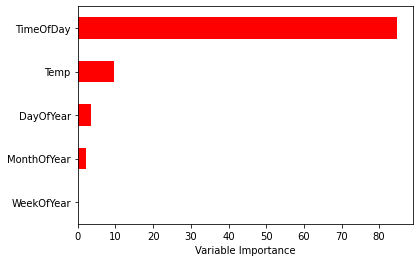

In [13]:
Importance = pd.DataFrame({'Importance':xgb_tuned.feature_importances_*100}, 
                          index = X_train.columns)


Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'r', )

plt.xlabel('Variable Importance')
plt.gca().legend_ = None